In [9]:
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
iris_data_set = pd.read_csv('SVPWM.csv')
X = iris_data_set.iloc[:, 0:12].values
y = iris_data_set.iloc[:, 12:13].values
n_features = X.shape[1]

# gradient boosted trees tend to do well on problems like this
reg = XGBClassifier(n_estimators=50, random_state=0)

In [10]:
from skopt.space import Real, Integer
from skopt.utils import use_named_args
import numpy as np

# The list of hyper-parameters we want to optimize. For each one we define the
# bounds, the corresponding scikit-learn parameter name, as well as how to
# sample values from that dimension (`'log-uniform'` for the learning rate)
space  = [Integer(4, 20, name='max_depth'),
          Real(10**-4, 5, "log-uniform", name='learning_rate'),
          Real(0,1,  name='gamma'),
          Integer(5, 300, name='min_child_weight'),
          Real(0.1, 1, name='colsample_bytree')]

# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set
# scikit-learn estimator parameters
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X, y, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

In [11]:
from skopt import gp_minimize
from skopt import forest_minimize
res_gp = forest_minimize(objective, space, n_calls=100, random_state=0)

"Best score=%.4f" % res_gp.fun

'Best score=0.4550'

In [12]:
print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- gamma=%d
- min_child_weight=%d
- colsample_bytree=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3],
                            res_gp.x[4]))

Best parameters:
- max_depth=20
- learning_rate=1.264237
- gamma=0
- min_child_weight=50
- colsample_bytree=0


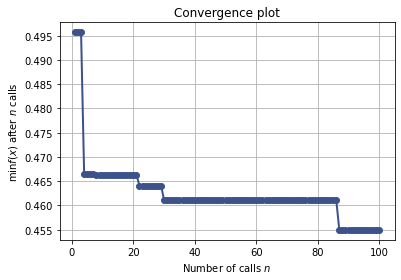

In [13]:
from skopt.plots import plot_convergence

plot_convergence(res_gp)
fig=plt.gcf()
fig.savefig('./666.jpg')

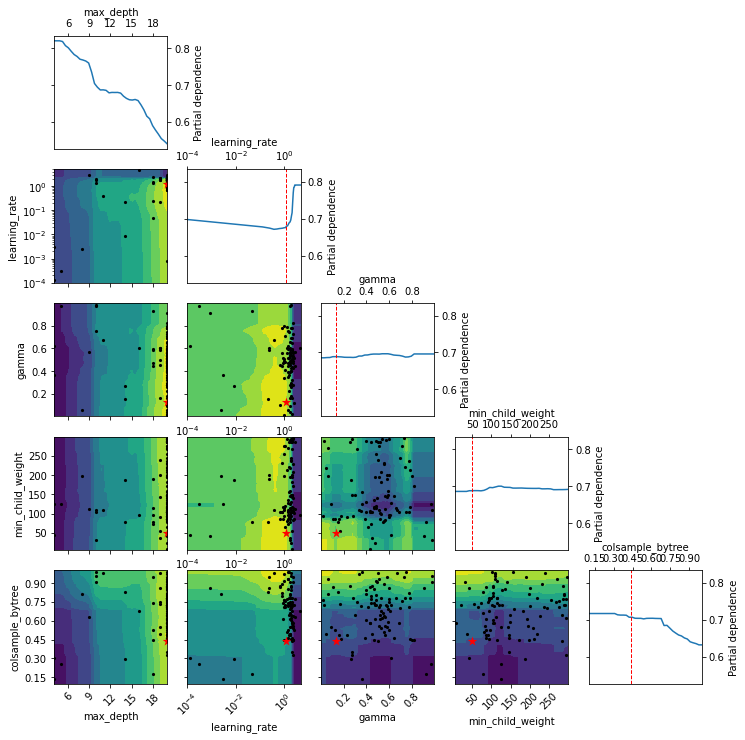

In [14]:
from skopt.plots import plot_objective 
plot_objective (res_gp)
fig=plt.gcf()
fig.subplots_adjust(hspace=0.18, wspace=0.18)
fig.savefig('./111.jpg')

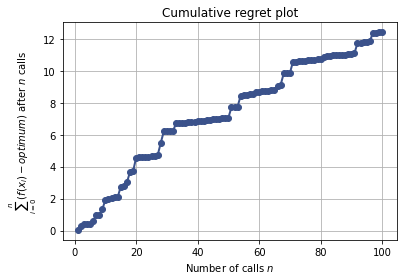

In [15]:
from skopt.plots import plot_regret 
plot_regret (res_gp)
fig=plt.gcf()
fig.savefig('./222.jpg')

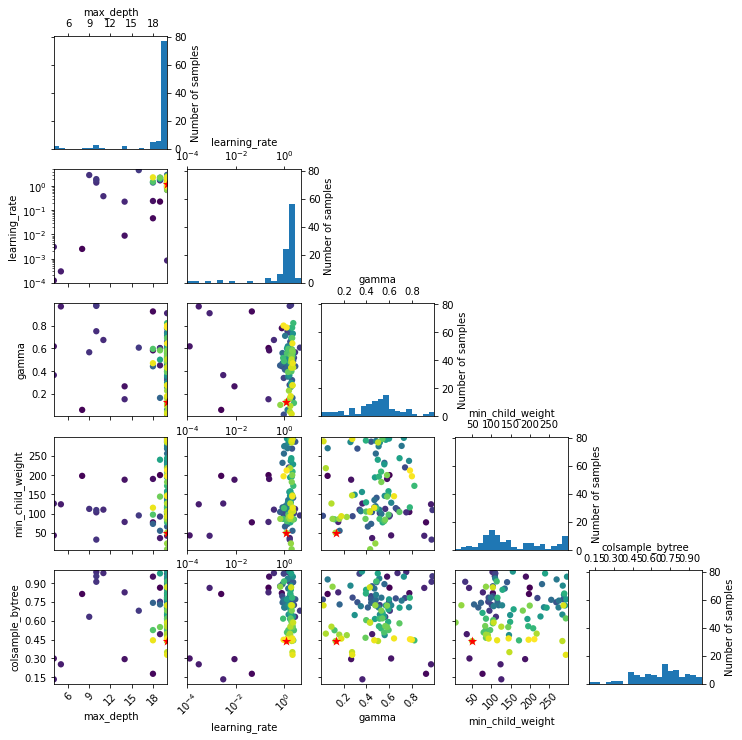

In [16]:
from skopt.plots import plot_evaluations 

plot_evaluations (res_gp)
fig=plt.gcf()
fig.subplots_adjust(hspace=0.18, wspace=0.18)
fig.savefig('./333.jpg',dpi=500)